In [1]:
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

# Thiết lập để import từ thư mục src
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.features import lexical_features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [2]:
PROCESSED_DATA_PATH = '../data/processed/dataset_processed.csv'
df = pd.read_csv(PROCESSED_DATA_PATH)

In [ ]:
print("Bắt đầu trích xuất bộ đặc trưng văn bản đầy đủ...")

# Danh sách các hàm cần áp dụng
feature_functions = {
    'url_length': lexical_features.get_url_length,
    'hostname_length': lexical_features.get_hostname_length,
    'dot_count': lexical_features.count_dots,
    'hyphen_count': lexical_features.count_hyphens,
    'at_symbol_count': lexical_features.count_at_symbol,
    'slash_count': lexical_features.count_slashes,
    'question_mark_count': lexical_features.count_question_mark,
    'equals_count': lexical_features.count_equals,
    'and_symbol_count': lexical_features.count_and_symbol,
    'path_length': lexical_features.get_path_length,
    'url_digit_count': lexical_features.count_digits_in_url,
    'url_letter_count': lexical_features.count_letters_in_url,
    'hostname_digit_count': lexical_features.count_digits_in_hostname,
    'has_https': lexical_features.has_https,
    'has_suspicious_tld': lexical_features.has_suspicious_tld,
}

# Áp dụng tất cả các hàm một cách tự động
for feature_name, func in feature_functions.items():
    print(f"  - Trích xuất '{feature_name}'...")
    df[feature_name] = df['url'].apply(func)

print("\nTrích xuất đặc trưng hoàn tất!")
print("\n5 dòng đầu tiên với các đặc trưng mới:")
print(df.head())

In [ ]:
# Cập nhật danh sách các cột đặc trưng
feature_columns = list(feature_functions.keys())

X = df[feature_columns]
y = df['label']

print("Kích thước ma trận đặc trưng X:", X.shape)
print("\nCác đặc trưng được sử dụng:")
print(X.columns.tolist())

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- Mô hình 1: Logistic Regression ---
print("Bắt đầu huấn luyện mô hình Logistic Regression...")
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)
print("Huấn luyện Logistic Regression hoàn tất!")

# --- Mô hình 2: Random Forest ---
print("\nBắt đầu huấn luyện mô hình Random Forest...")

# n_jobs = -1: Sử dụng tất cả các nhân CPU để huấn luyện nhanh hơn
model_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)
model_rf.fit(X_train, y_train)
print("Huấn luyện Random Forest hoàn tất!")


Huấn luyện mô hình Logistic Regression hoàn tất!



Báo cáo Phân loại (Classification Report):
                precision    recall  f1-score   support

Legitimate (0)       0.81      0.99      0.89     78579
  Phishing (1)       0.85      0.22      0.34     22860

      accuracy                           0.81    101439
     macro avg       0.83      0.60      0.62    101439
  weighted avg       0.82      0.81      0.77    101439


Ma trận Nhầm lẫn (Confusion Matrix):


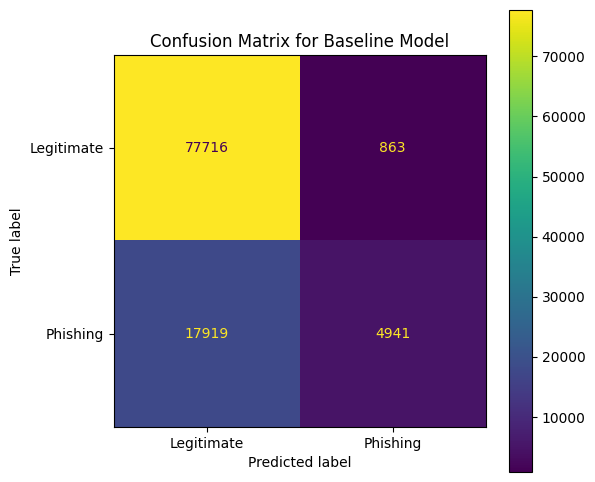

In [ ]:
print("--- Đánh giá mô hình Logistic Regression ---")
y_pred_lr = model_lr.predict(X_test)
print(classification_report(y_test, y_pred_lr, target_names=['Legitimate', 'Phishing']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['Legitimate', 'Phishing'])
plt.title("Confusion Matrix for Logistic Regression (V2)")
plt.show()

print("\n" + "="*50 + "\n")

print("--- Đánh giá mô hình Random Forest ---")
y_pred_rf = model_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf, target_names=['Legitimate', 'Phishing']))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Legitimate', 'Phishing'])
plt.title("Confusion Matrix for Random Forest (V2)")
plt.show()